# Taller de Manejo y Análisis de Datos

# Primer semestre 2023

# Prueba



## Instrucciones

Este examen es **individual**. Cualquier transgreción al código de honor será sancionada de acuerdo al reglamento. 

Desarrolle sus respuestas en este cuaderno Jupyter en las secciones indicadas para ello. Puede agregar más bloques si así lo desea, en la medida que se mantenga el orden de las actividades. 

La entrega vía webcursos en el buzón "Entrega Examen"

----

Para comenzar, indique su nombre y RUT.

In [ ]:
# Nombre: Eduardo Carrasco vidal
# Rut: 170727614

## Introducción


En esta evaluación trabajaremos con cuatro bases de datos provista por *GapMinder*:

* `income_per_person.csv` contiene datos sobre el ingreso per cápita para una lista de 195 países entre 1800 y 2050. Los valores están ajustados por inflación y en dólares estadounidences. 
* `children_per_woman.csv` contiene datos sobre el número de niños por mujer para  una lista de 202 países entre 1800 y 2100.
* `internet_users.csv` contiene datos sobre el uso de internet cada 100 personas, para una lista de 213 países entre 1960 y 2020.
* `co2_emissions_tonnes_per_person.csv` contiene datos sobre el uso las emisiones de CO2 per cápita, para una lista de 194 países entre 1800 y 2018.

Nuestro objetivo será plantear hipótesis sobre las posibles relaciones entre los indices contenidos en las bases de datos.

----
## Actividad 1 (0,5 puntos)
Utilizando comandos de Pandas, abra los cinco archivos y almacene cada uno en un data frame.

Use un comando para inspeccionar las 3 primeras líneas y los encabezados.

In [1]:
#Respuesta Actividad 1
import pandas as pd
income_per_person = pd.read_csv("income_per_person.csv")
children_per_woman = pd.read_csv("children_per_woman.csv")
co2_emissions_tonnes_per_person = pd.read_csv("co2_emissions_tonnes_per_person.csv")
internet_users = pd.read_csv("internet_users.csv")

In [2]:
income_per_person.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k


In [3]:
children_per_woman.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40


In [4]:
co2_emissions_tonnes_per_person.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590


In [5]:
internet_users.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,74.00,78.9,83.8,88.70,93.5,97.2,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.45,5.9,7.0,8.26,11.0,13.5,16.8,17.6,18.4
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,7.70,13.0,21.4,22.00,23.2,26.0,29.0,32.4,36.0


----

## Actividad 2 (1 puntos)

Notará que las bases de datos no comprenden los mismos periodos. Sin embargo, todas continen datos entre 1990 y 2018. El objetivo de esta activdad es crear una función que homogenice las bases de datos. 

Más precisamente, escriba una función llamada `Actividad2` que reciba como argumentos tres strings:

* nombre_archivo: Un string representando el nombre de una base de datos
* inicial: Un string representando un año inicial
* final: Un string representando un año final

La función debe devolver un DataFrame con una versión del archivo de nombre `nombre_archivo` cuyos índices corresponden a la `country`, y las columnas son los años desde 1990 hasta 2018. 

In [41]:
def Actividad2(nombre_archivo, inicial, final):
    'Devuelve un Dataframe filtrado'
    ## Leemos el archivo
    df = pd.read_csv(nombre_archivo)
    
    ## Filtrar años en base a columna
    years = list(map(str, range(int(inicial), int(final) + 1)))
    
    # Filtrar las columnas y mantener la columna 'country'
    df_1 = ['country'] + years
    df_2 = df[df_1]
    
    return df_2

In [42]:
# Pruebe su programa con los siguientes comandos
dfIncome   = Actividad2("income_per_person.csv","1990","2018")
dfChildren = Actividad2("children_per_woman.csv","1990","2018")
dfInternet = Actividad2("internet_users.csv","1990","2018")
dfCO2      = Actividad2("co2_emissions_tonnes_per_person.csv","1990","2018")

display(dfIncome)
display(dfChildren)
display(dfInternet)
display(dfCO2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,1120,1020,981,672,498,736,698,663,634,...,1760,1960,1910,2080,2120,2100,2070,2060,2060,2030
1,Angola,1610,1670,1620,1260,1300,1530,1780,1960,2110,...,7760,7690,7680,8040,8140,8240,8040,7570,7310,6930
2,Albania,4830,3500,3270,3600,3920,4470,4910,4400,4820,...,10.3k,10.7k,11.1k,11.2k,11.4k,11.6k,11.9k,12.3k,12.8k,13.3k
3,Andorra,32.2k,31.7k,30.8k,29.4k,29.3k,29.6k,30.8k,33.7k,34.9k,...,47.2k,44.1k,47.5k,47.5k,49.5k,50.9k,52.7k,54.5k,56.3k,58.3k
4,United Arab Emirates,51.3k,50.5k,50.5k,50.1k,53.1k,56.2k,58.6k,62.8k,62.8k,...,58.4k,54.9k,56.1k,57.4k,59.9k,62.5k,65.3k,66.5k,67.2k,67k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,4060,3940,3890,4010,3870,4100,4370,4370,4450,...,6030,6010,6210,5900,5830,5790,6000,6450,6490,6390
191,Yemen,4210,4260,4370,4320,4390,4440,4480,4570,4700,...,5340,5590,4750,4740,4840,4710,3310,2910,2700,2660
192,South Africa,11.3k,10.9k,10.4k,10.3k,10.3k,10.4k,10.7k,10.8k,10.6k,...,13.4k,13.6k,13.8k,13.9k,14.1k,14k,14k,13.9k,13.9k,13.9k
193,Zambia,2190,2130,2050,2130,1900,1910,1980,2000,1930,...,2920,3130,3200,3340,3400,3450,3440,3470,3490,3520


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,2.25,2.22,2.19,2.15,2.11,2.06,2.02,1.98,1.94,...,1.71,1.70,1.69,1.70,1.71,1.73,1.76,1.78,1.80,1.80
1,Afghanistan,7.47,7.48,7.50,7.54,7.57,7.61,7.63,7.64,7.62,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
2,Angola,7.25,7.19,7.13,7.06,6.99,6.92,6.85,6.79,6.73,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
3,Albania,2.98,2.91,2.83,2.75,2.67,2.59,2.51,2.42,2.33,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
4,Netherlands Antilles,2.30,2.29,2.28,2.26,2.23,2.20,2.17,2.15,2.13,...,1.95,1.94,1.92,1.91,1.89,1.88,1.87,1.86,1.85,1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Samoa,5.12,5.03,4.96,4.88,4.82,4.75,4.69,4.64,4.59,...,4.39,4.34,4.28,4.21,4.15,4.09,4.03,3.98,3.93,3.88
198,Yemen,8.61,8.46,8.27,8.05,7.80,7.53,7.25,6.99,6.74,...,4.80,4.67,4.55,4.44,4.33,4.22,4.10,4.00,3.89,3.79
199,South Africa,3.65,3.53,3.41,3.29,3.20,3.11,3.04,2.97,2.92,...,2.60,2.59,2.57,2.55,2.53,2.51,2.49,2.46,2.43,2.40
200,Zambia,6.44,6.38,6.33,6.28,6.23,6.19,6.15,6.12,6.09,...,5.48,5.40,5.32,5.24,5.17,5.10,5.04,4.98,4.93,4.87


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,0.0,0,0.0000,0.000,0.00000,0,2.77000,NaN,NaN,...,58.00,62.0,69.0,74.00,78.9,83.8,88.70,93.5,97.2,NaN
1,Afghanistan,0.0,0,0.0000,0.000,0.00000,0,NaN,NaN,NaN,...,3.55,4.0,5.0,5.45,5.9,7.0,8.26,11.0,13.5,16.8
2,Angola,0.0,0,0.0000,0.000,0.00000,0,0.00078,0.00567,0.0185,...,2.30,2.8,4.7,7.70,13.0,21.4,22.00,23.2,26.0,29.0
3,Albania,0.0,0,0.0000,0.000,0.00000,0.0112,0.03220,0.04860,0.0650,...,41.20,45.0,47.0,49.40,51.8,54.3,56.90,59.6,62.4,65.4
4,Andorra,0.0,0,0.0000,0.000,0.00000,0,1.53000,3.05000,6.8900,...,78.50,81.0,81.0,82.70,84.4,86.1,87.90,89.7,91.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Samoa,0.0,0,0.0000,0.000,0.00000,0,NaN,0.17500,0.2300,...,6.00,7.0,11.0,12.90,15.3,21.2,25.40,29.4,33.6,NaN
209,Yemen,0.0,0,0.0000,0.000,0.00000,0,0.00062,0.01500,0.0233,...,9.96,12.3,14.9,17.40,20.0,22.6,24.10,24.6,26.7,NaN
210,South Africa,0.0,0.0133,0.0389,0.114,0.24700,0.677,0.84200,1.63000,2.9100,...,10.00,24.0,34.0,41.00,46.5,49.0,51.90,54.0,56.2,62.4
211,Zambia,0.0,0,0.0000,0.000,0.00678,0.00878,0.00907,0.00933,0.0302,...,2.50,3.0,3.5,4.10,4.8,6.5,8.80,10.3,12.2,14.3


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.210,0.183,0.0954,0.0844,0.0752,0.068,0.0619,0.0561,0.0522,...,0.238,0.290,0.406,0.345,0.280,0.253,0.262,0.245,0.247,0.254
1,Angola,0.430,0.414,0.4080,0.4400,0.2860,0.786,0.7250,0.4940,0.4740,...,1.230,1.240,1.250,1.350,1.280,1.640,1.220,1.180,1.140,1.120
2,Albania,1.680,1.310,0.7750,0.7310,0.6120,0.670,0.6510,0.4980,0.5630,...,1.470,1.560,1.790,1.690,1.690,1.900,1.600,1.570,1.610,1.590
3,Andorra,7.470,7.180,6.9100,6.7400,6.4900,6.660,7.0600,7.2400,7.6600,...,6.120,6.120,5.870,5.920,5.900,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,28.300,29.300,28.2000,30.2000,31.7000,29.000,28.7000,27.4000,28.7000,...,20.900,18.300,18.900,23.800,23.700,24.200,20.700,21.700,21.100,21.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Samoa,0.631,0.648,0.6650,0.6580,0.6740,0.690,0.7280,0.7460,0.7640,...,1.010,1.010,1.080,1.050,1.040,1.090,1.210,1.260,1.290,1.320
190,Yemen,0.814,0.743,0.7630,0.6330,0.6290,0.695,0.6810,0.7090,0.7340,...,1.080,1.000,0.849,0.747,0.994,0.937,0.480,0.377,0.363,0.356
191,South Africa,8.510,8.650,7.8000,8.1000,8.3600,8.740,8.6200,8.9800,8.6400,...,9.960,9.160,9.160,8.770,8.530,8.860,8.350,8.460,8.120,8.100
192,Zambia,0.300,0.289,0.2870,0.2850,0.2700,0.236,0.1970,0.2450,0.2310,...,0.182,0.189,0.199,0.241,0.252,0.277,0.271,0.296,0.304,0.302


Verificamos la cantidad de cartegorías que tiene cada variable, objeto apoyar la pregunta 2.

In [47]:
dfIncome.iloc[:, 0].describe()

count             195
unique            195
top       Afghanistan
freq                1
Name: country, dtype: object

In [48]:
dfChildren.iloc[:, 0].describe()

count       202
unique      202
top       Aruba
freq          1
Name: country, dtype: object

In [49]:
dfInternet.iloc[:, 0].describe()

count       213
unique      213
top       Aruba
freq          1
Name: country, dtype: object

In [50]:
dfCO2.iloc[:, 0].describe()

count             194
unique            194
top       Afghanistan
freq                1
Name: country, dtype: object

----

## Actividad 2 (1 punto)

Luego de limpiar las columnas, notamos que no todas las bases de datos contienen las mismas listas de países (filas).


Escriba un programa que limpie las bases de datos, de manera que todas tengan la misma lista de países, y ésta sea la mayor posible. Debe quedar una lista de 185 países (filas). 

In [73]:
def Actividad2_2(dataframes):
    'tomar como output return del Actividad2'
    # paises comunes del primer set (db), columna 'country'
    paises_comunes = set(dataframes[0]['country'])
    
    # ciclo for sobre cada set de los otros, intersectar los iguales
    for df in dataframes[1:]:
        paises_comunes = paises_comunes.intersection(df['country'])
    
    # Crear una lista de DataFrames filtrados
    dfs_filtrados = []
    for df in dataframes:
        # Filtrar el DataFrame para incluir solo los países comunes
        df_filtrado = df[df['country'].isin(paises_comunes)]
        dfs_filtrados.append(df_filtrado)
    
    return dfs_filtrados

In [79]:
## ejecutar la función y generar nuevas bases de datos (frames)
dataframes = [dfIncome, dfChildren, dfInternet, dfCO2]
dfs_filtrados = Actividad2_2(dataframes)

dfIncome_1 = dfs_filtrados[0]
dfChildren_1 = dfs_filtrados[1]
dfInternet_1 = dfs_filtrados[2]
dfCO2_1 = dfs_filtrados[3]

Comprobamos cantidad de valores por cada columna

In [75]:
dfIncome_1.iloc[:, 0].describe()

count             185
unique            185
top       Afghanistan
freq                1
Name: country, dtype: object

In [76]:
dfChildren_1.iloc[:, 0].describe()

count             185
unique            185
top       Afghanistan
freq                1
Name: country, dtype: object

In [77]:
dfInternet_1.iloc[:, 0].describe()

count             185
unique            185
top       Afghanistan
freq                1
Name: country, dtype: object

In [78]:
dfCO2_1.iloc[:, 0].describe()

count             185
unique            185
top       Afghanistan
freq                1
Name: country, dtype: object

----

## Actividad 3 (1 punto)

Notará que los datos obtenidos de la base de datos `income_per_person.csv` contienen los valores mayores a 10 mil representados por 10k. Escriba un programa que transforme todos los valores a números (i.e. multiplique por 1000 los valores que tengan una k).

In [83]:
dfIncome_1.iloc[:, 1].describe() #verificar tipo de dato (dtype)

count      185
unique     169
top       1120
freq         3
Name: 1990, dtype: object

In [121]:
## convertir object a float, para esto, reemplazar el k por un *1000
def object_to_float(columnas):
    # Verificar si la columna contiene una 'k'
    if isinstance(columnas, str) and 'k' in columnas:
        # si es afirmativo, reemplazar por *1000
        return float(columnas.replace('k', '')) * 1000
    else:
        # E.O.C. convertirlo a float
        return float(columnas)

In [122]:
columnas = dfIncome_1.columns[1:30]

# Aplicar la función object_to_float a cada columna
for columna in columnas:
    dfIncome_1.loc[:, columna].apply(object_to_float)

In [125]:
dfIncome_1.iloc[:, 1].describe()

count      185.000000
mean     12251.978378
std      13795.142118
min        471.000000
25%       2470.000000
50%       7100.000000
75%      15500.000000
max      71200.000000
Name: 1990, dtype: float64

----
## Actividad 4 (1 punto)

Escriba un programa que reciba como argumentos el nombre de un país y los cuatro DataFrames trabajados en la actividad anterior, y genere un dataFrame solo con los datos de dicho país, con las columnas "Ingreso", "Niños", "Internet" y "CO2". 

Para comparar las columnas, divida cada una de ellas por su máximo para obtener en cada una de ellas valores entre 0 y 1.

In [178]:
def generar_datos_paises(dfIncome_1, dfChildren_1, dfInternet_1, dfCO2_1, country):
    # Filtrar los datos por país
    ingreso_pais = dfIncome_1[dfIncome_1['country'] == country].drop(columns='country').T
    ingreso_pais.columns = ['Ingreso']

    niños_pais = dfChildren_1[dfChildren_1['country'] == country].drop(columns='country').T
    niños_pais.columns = ['Niños']

    internet_pais = dfInternet_1[dfInternet_1['country'] == country].drop(columns='country').T
    internet_pais.columns = ['Internet']

    co2_pais = dfCO2_1[dfCO2_1['country'] == country].drop(columns='country').T
    co2_pais.columns = ['CO2']

    # Combinar los datos en un nuevo DataFrame
    datos_pais = pd.concat([ingreso_pais, niños_pais, internet_pais, co2_pais], axis=1)
    return datos_pais

# Generar el nuevo conjunto de datos filtrado por país (por ejemplo, 'Argentina')
datos_pais = generar_datos_paises(dfIncome_1, dfChildren_1, dfInternet_1, dfCO2_1, 'Chile')

# Mostrar el nuevo conjunto de datos
print(datos_pais)

      Ingreso  Niños Internet   CO2
1990   9850.0   2.55      0.0  2.48
1991  10400.0   2.50        0  2.31
1992  11400.0   2.46   0.0365  2.35
1993  12000.0   2.41   0.0718  2.46
1994  12400.0   2.36    0.141  2.67
1995  13300.0   2.31    0.347  2.86
1996  14000.0   2.27    0.683  3.27
1997  14800.0   2.23     1.06  3.75
1998  15300.0   2.18     1.66  3.80
1999  15000.0   2.14      4.1  4.02
2000  15600.0   2.11     16.6  3.79
2001  16000.0   2.07     19.1  3.39
2002  16300.0   2.05     22.1  3.48
2003  16800.0   2.02     25.5  3.47
2004  17800.0   2.00     28.2  3.69
2005  18600.0   1.98     31.2  3.77
2006  19600.0   1.96     34.5  3.91
2007  20300.0   1.95     35.9  4.28
2008  20800.0   1.93     37.3  4.24
2009  20300.0   1.90     41.6  3.91
2010  21300.0   1.88     45.0  4.18
2011  22300.0   1.86     52.2  4.53
2012  23300.0   1.83     55.0  4.58
2013  24000.0   1.82     58.0  4.65
2014  24200.0   1.80     61.1  4.36
2015  24400.0   1.79     76.6  4.55
2016  24500.0   1.77     83.

In [188]:
datos_pais['Internet'] = pd.to_numeric(datos_pais['Internet'], errors='coerce')

In [191]:
datos_pais['Ingreso'] /= datos_pais['Ingreso'].max()
datos_pais['Niños'] /= datos_pais['Niños'].max()
datos_pais['Internet'] /= datos_pais['Internet'].max()
datos_pais['CO2'] /= datos_pais['CO2'].max()

print(datos_pais)

      Ingreso     Niños  Internet       CO2
1990    0.394  1.000000  0.000000  0.533333
1991    0.416  0.980392  0.000000  0.496774
1992    0.456  0.964706  0.000430  0.505376
1993    0.480  0.945098  0.000846  0.529032
1994    0.496  0.925490  0.001661  0.574194
1995    0.532  0.905882  0.004087  0.615054
1996    0.560  0.890196  0.008045  0.703226
1997    0.592  0.874510  0.012485  0.806452
1998    0.612  0.854902  0.019552  0.817204
1999    0.600  0.839216  0.048292  0.864516
2000    0.624  0.827451  0.195524  0.815054
2001    0.640  0.811765  0.224971  0.729032
2002    0.652  0.803922  0.260306  0.748387
2003    0.672  0.792157  0.300353  0.746237
2004    0.712  0.784314  0.332155  0.793548
2005    0.744  0.776471  0.367491  0.810753
2006    0.784  0.768627  0.406360  0.840860
2007    0.812  0.764706  0.422850  0.920430
2008    0.832  0.756863  0.439340  0.911828
2009    0.812  0.745098  0.489988  0.840860
2010    0.852  0.737255  0.530035  0.898925
2011    0.892  0.729412  0.61484

## Actividad 5 (1 punto)

Escriba un programa que reciba como argumentos el nombre de un país y los cuatro DataFrames trabajados en las actividades anteriores, y genere una figura con 5 gráficos en que se compare la evolución del ingreso, el número de niños por mujer, el acceso a internet y las emisiones de CO2 per capita para dicho país. A continuación (y adjunto a este cuaderno) se muestra un ejemplo de la figura esperada para el caso en que el país escogido sea Chile.


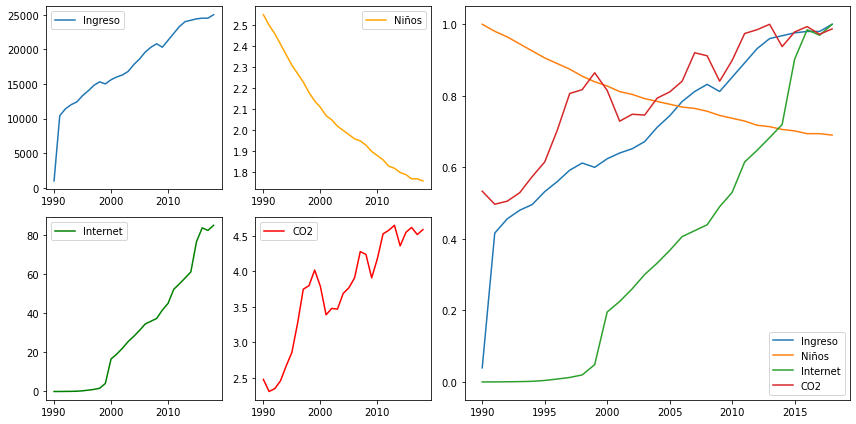

In [219]:
import matplotlib.pyplot as plt

def generar_graficos_normalizados(datos_pais):
    # Crear la figura y los subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Graficar la evolución del ingreso
    axs[0, 0].plot(datos_pais.index, datos_pais['Ingreso'])

    # Graficar la evolución del número de niños por mujer
    axs[0, 1].plot(datos_pais.index, datos_pais['Niños'])

    # Graficar la evolución del acceso a internet
    axs[1, 0].plot(datos_pais.index, datos_pais['Internet'])

    # Graficar la evolución de las emisiones de CO2 per capita
    axs[1, 1].plot(datos_pais.index, datos_pais['CO2'])

    # Crear un gráfico grande para mostrar los 4 al mismo tiempo
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    ax2.plot(datos_pais.index, datos_pais['Ingreso'], label='Ingreso')
    ax2.plot(datos_pais.index, datos_pais['Niños'], label='Niños')
    ax2.plot(datos_pais.index, datos_pais['Internet'], label='Internet')
    ax2.plot(datos_pais.index, datos_pais['CO2'], label='CO2')
    ax2.set_xlabel('Año')
    ax2.set_ylabel('Valor normalizado')
    ax2.legend()

    # Ajustar el espaciado entre subplots
    fig.tight_layout()

    # Mostrar las figuras
    plt.show()

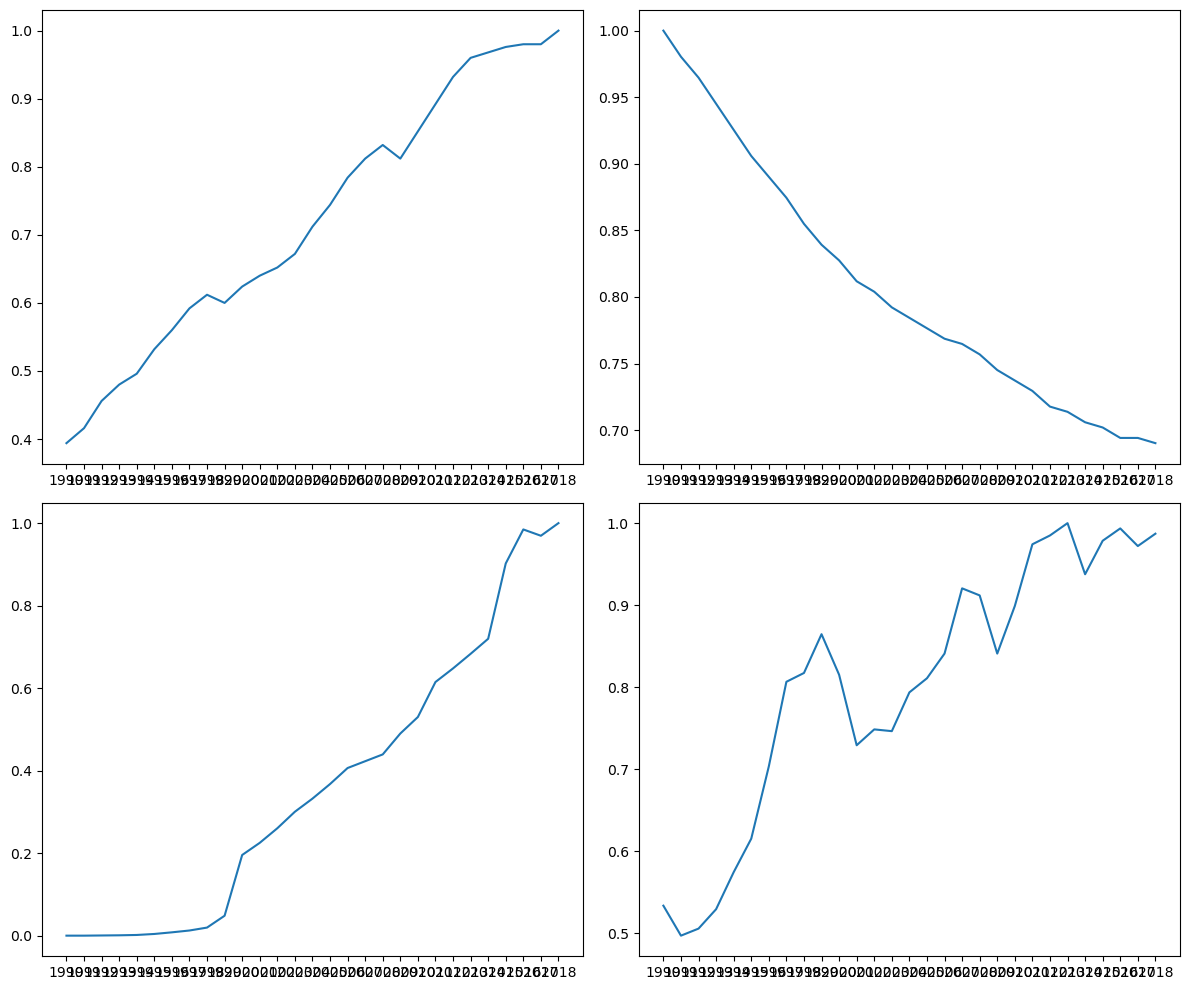

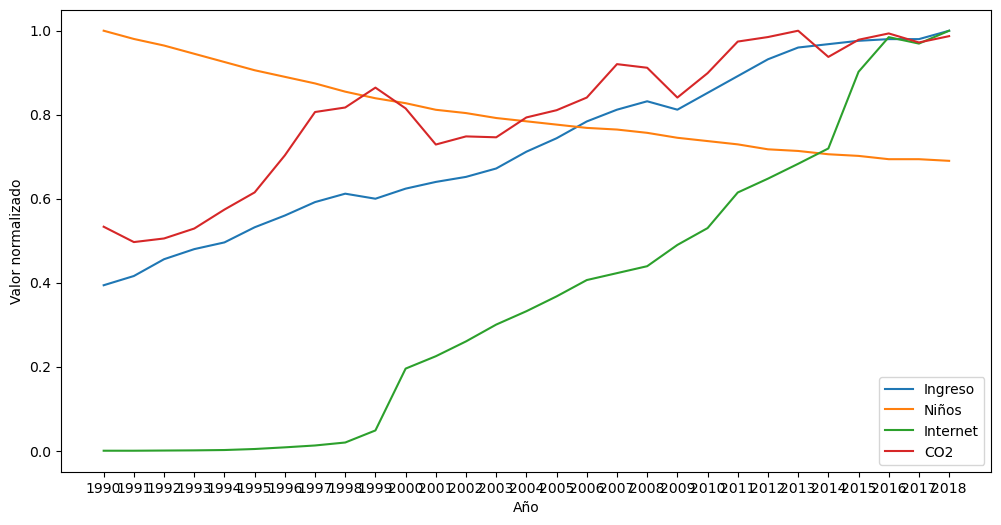

In [220]:
generar_graficos_normalizados(datos_pais)

## Actividad 6 (0,5 punto)

Analice y establezca hipótesis sobre las relaciones entre las variables Ingreso per Cápita, Número de Niños por Mujer, Conectividad a Internet per Cápita y Emisiones de CO2. Justifique su análisis comparando gráficos para distintos países (tome como ejemplos Chile, Alemania, China, Ruisa y el Sudafrica)



In [ ]:
# Escriba aquí su solución